In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch import nn
import glob
import numpy as np
import matplotlib.pyplot as plt


torch.__version__

import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets

from torchsummary import summary
from tqdm.notebook import trange, tqdm

In [ ]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Define the transforms to apply to the images
train_transform = transforms.Compose([
    transforms.Resize(size=(28,28)),
    # transforms.Grayscale(),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

test_transform = transforms.Compose([
    transforms.Resize(size=(28,28)),
    # transforms.Grayscale(),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

# Load the training set
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/FloodNet/train', transform=train_transform)

# Create the data loader for the training set
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder('/content/drive/MyDrive/FloodNet/train', transform=test_transform)

# Create the data loader for the training set
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)


In [ ]:
# See first training sample
image, label = train_dataset[0]
image, label

(tensor([[[0.1020, 0.2353, 0.3961,  ..., 0.4157, 0.4392, 0.4157],
          [0.0902, 0.1882, 0.4157,  ..., 0.3765, 0.3961, 0.4039],
          [0.0863, 0.2471, 0.4392,  ..., 0.3843, 0.4118, 0.4078],
          ...,
          [0.2902, 0.4471, 0.4392,  ..., 0.2980, 0.2863, 0.2863],
          [0.2863, 0.4510, 0.4392,  ..., 0.3216, 0.3059, 0.2980],
          [0.2941, 0.4392, 0.4118,  ..., 0.3373, 0.3333, 0.3020]],
 
         [[0.1333, 0.2824, 0.3882,  ..., 0.3098, 0.3255, 0.3098],
          [0.1216, 0.2314, 0.3922,  ..., 0.2863, 0.2980, 0.2980],
          [0.1137, 0.2824, 0.4039,  ..., 0.2863, 0.3098, 0.3059],
          ...,
          [0.3294, 0.4000, 0.4039,  ..., 0.2078, 0.2039, 0.2039],
          [0.3098, 0.3961, 0.4039,  ..., 0.2235, 0.2157, 0.2118],
          [0.3020, 0.3843, 0.3922,  ..., 0.2353, 0.2314, 0.2118]],
 
         [[0.0941, 0.0745, 0.1137,  ..., 0.1490, 0.1608, 0.1529],
          [0.0745, 0.0745, 0.1216,  ..., 0.1412, 0.1451, 0.1451],
          [0.0745, 0.0784, 0.1333,  ...,

In [ ]:
# What's the shape of the image?
image.shape

torch.Size([3, 28, 28])

In [ ]:
# How many samples are there?
print(len(train_dataset.targets))
print(len(test_dataset.targets))

398
398


In [ ]:
# See classes
class_names = test_dataset.classes
class_names

['Flooded', 'Non Flooded']

Image shape: torch.Size([3, 28, 28])


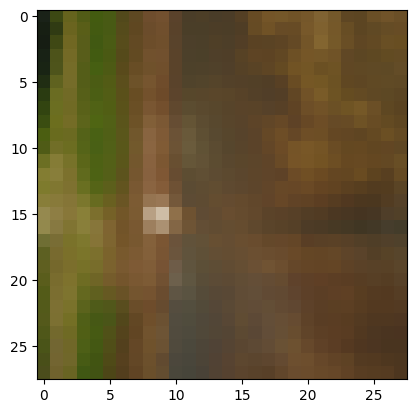

0


In [ ]:
import matplotlib.pyplot as plt
image, label = train_dataset[0]
print(f"Image shape: {image.shape}")
img_np = np.transpose(image, (1, 2, 0))  # Reshape to (28, 28, 3)
plt.imshow(img_np)
plt.show()
print(label)

In [ ]:
import matplotlib.pyplot as plt
image, label = train_dataset[0]
print(f"Image shape: {image.shape}")
image.squeeze()# image shape is [1, 28, 28] (colour channels, height, width)
print(f"Image shape: {image.shape}")

Image shape: torch.Size([3, 28, 28])
Image shape: torch.Size([3, 28, 28])


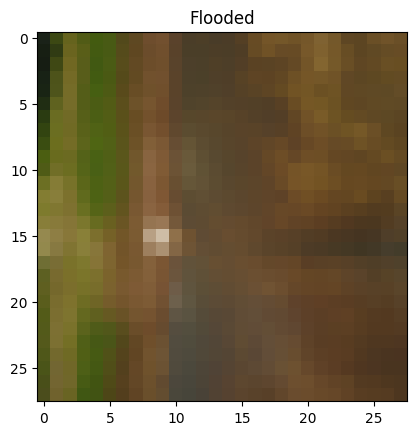

In [ ]:
image = np.transpose(image, (1, 2, 0))
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

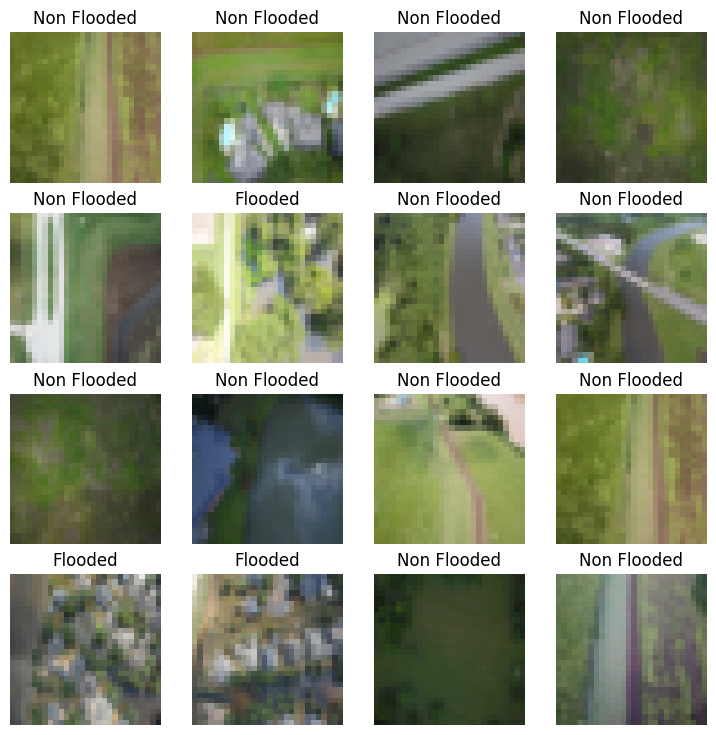

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 28, 28]), torch.Size([32]))

Image size: torch.Size([28, 28, 3])
Label: 1, label size: torch.Size([])


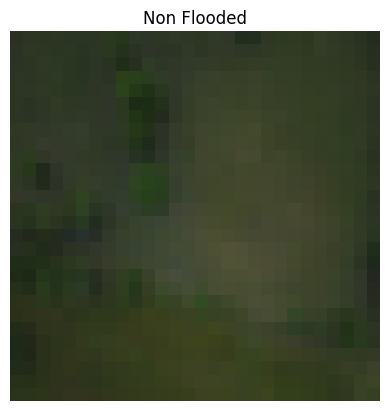

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
img = np.transpose(img, (1, 2, 0))
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=3,
    hidden_units=10,
    output_shape=2).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=2, bias=True)
  )
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)
from helper_functions import accuracy_fn

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.45543 | Train accuracy: 83.52%
Test loss: 0.37501 | Test accuracy: 87.74%

Epoch: 1
---------
Train loss: 0.38280 | Train accuracy: 87.74%
Test loss: 0.39564 | Test accuracy: 87.43%

Epoch: 2
---------
Train loss: 0.38584 | Train accuracy: 87.43%
Test loss: 0.37284 | Test accuracy: 87.74%

Train time on cuda: 834.003 seconds
